Problem statement :To apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables required for predicting how many times an online news article will be shared using a linear regression model.
Steps taken to solve the problem are:
* Data Loading
* Data Cleaning
* Exploratory Data Analysis
* Feature Selection And Dimensionality Reduction
* Train/Cross Validate Linear Regresssion Model


# Data Loading

In [1]:
import pandas as pd

# Loading the dataset
url = "https://raw.githubusercontent.com/mri177/mridul/main/M4_Data.csv?token=GHSAT0AAAAAACNVK7MIELYNP5J35Y6YG3QUZOIW4OQ"

# Read data into a Pandas DataFrame
df = pd.read_csv(url)


# Data Cleaning

In [2]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values
# Drop rows with missing values
df = df.dropna()

# Check data types
print(df.dtypes)

# Convert columns to appropriate data types
# Converting 'timedelta' to int
df[' timedelta'] = df[' timedelta'].astype(int)

# Verify changes
df.info()


url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64
url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #  

In [3]:
# Remove leading and trailing spaces in column names
df.columns = df.columns.str.strip()

# Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  int32  
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

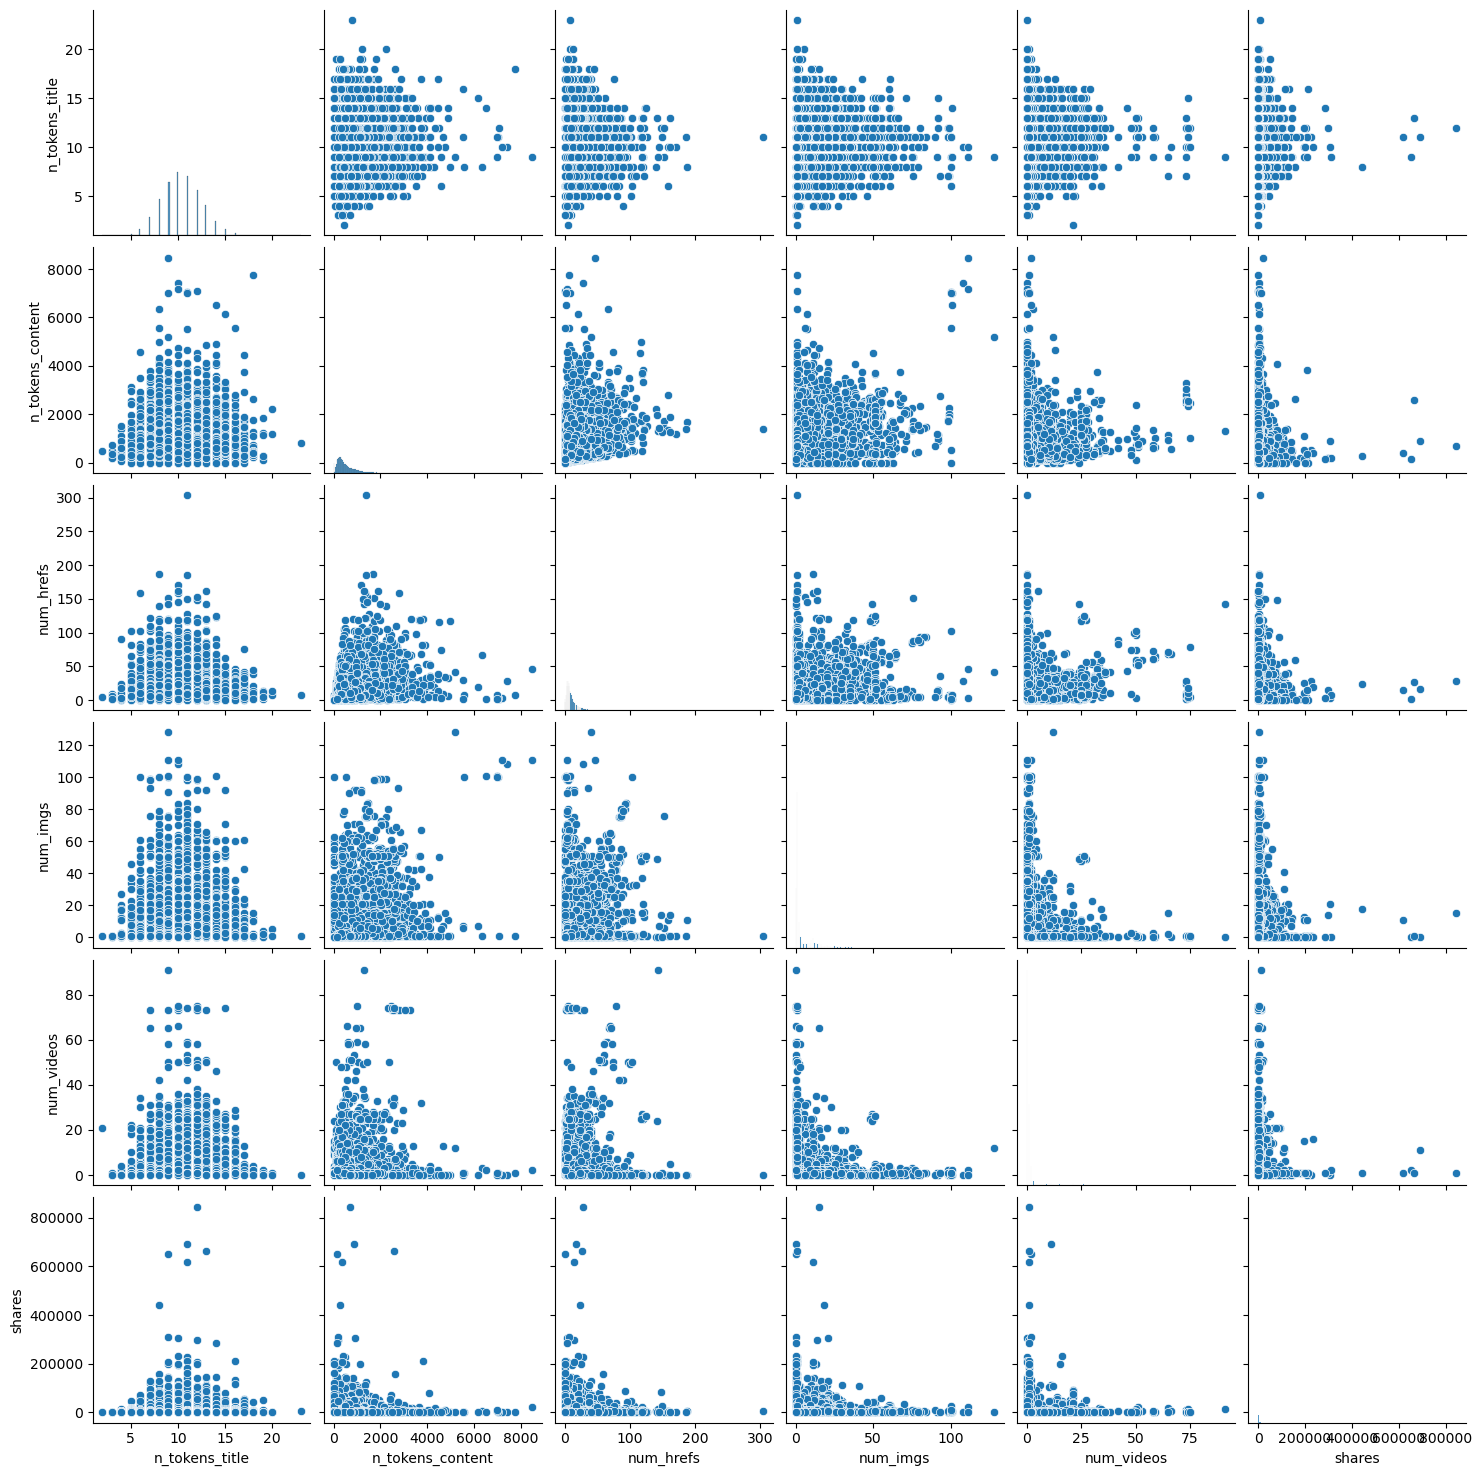

In [4]:
# Explore the dataset, check for missing values, summary statistics
df.info()
df.describe()

# Visualizations (use appropriate visualizations based on variable types)
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot for correlation analysis
sns.pairplot(df[['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_imgs', 'num_videos', 'shares']])
plt.show()




In [ ]:
# Inferences
* There is a positive correlation between the number of tokens in the title and the number of shares. This means that videos with longer titles tend to get more shares.
* There is a positive correlation between the number of tokens in the content and the number of shares. This means that videos with more content tend to get more shares.
* There is a positive correlation between the number of videos linked to and the number of shares. This means that videos that link to other videos tend to get more shares.
* There is a positive correlation between the number of images and the number of shares. This means that videos with more images tend to get more shares.
* There is a positive correlation between the number of unique words (tokens) used and the number of shares. This means that videos with a wider vocabulary tend to get more shares.

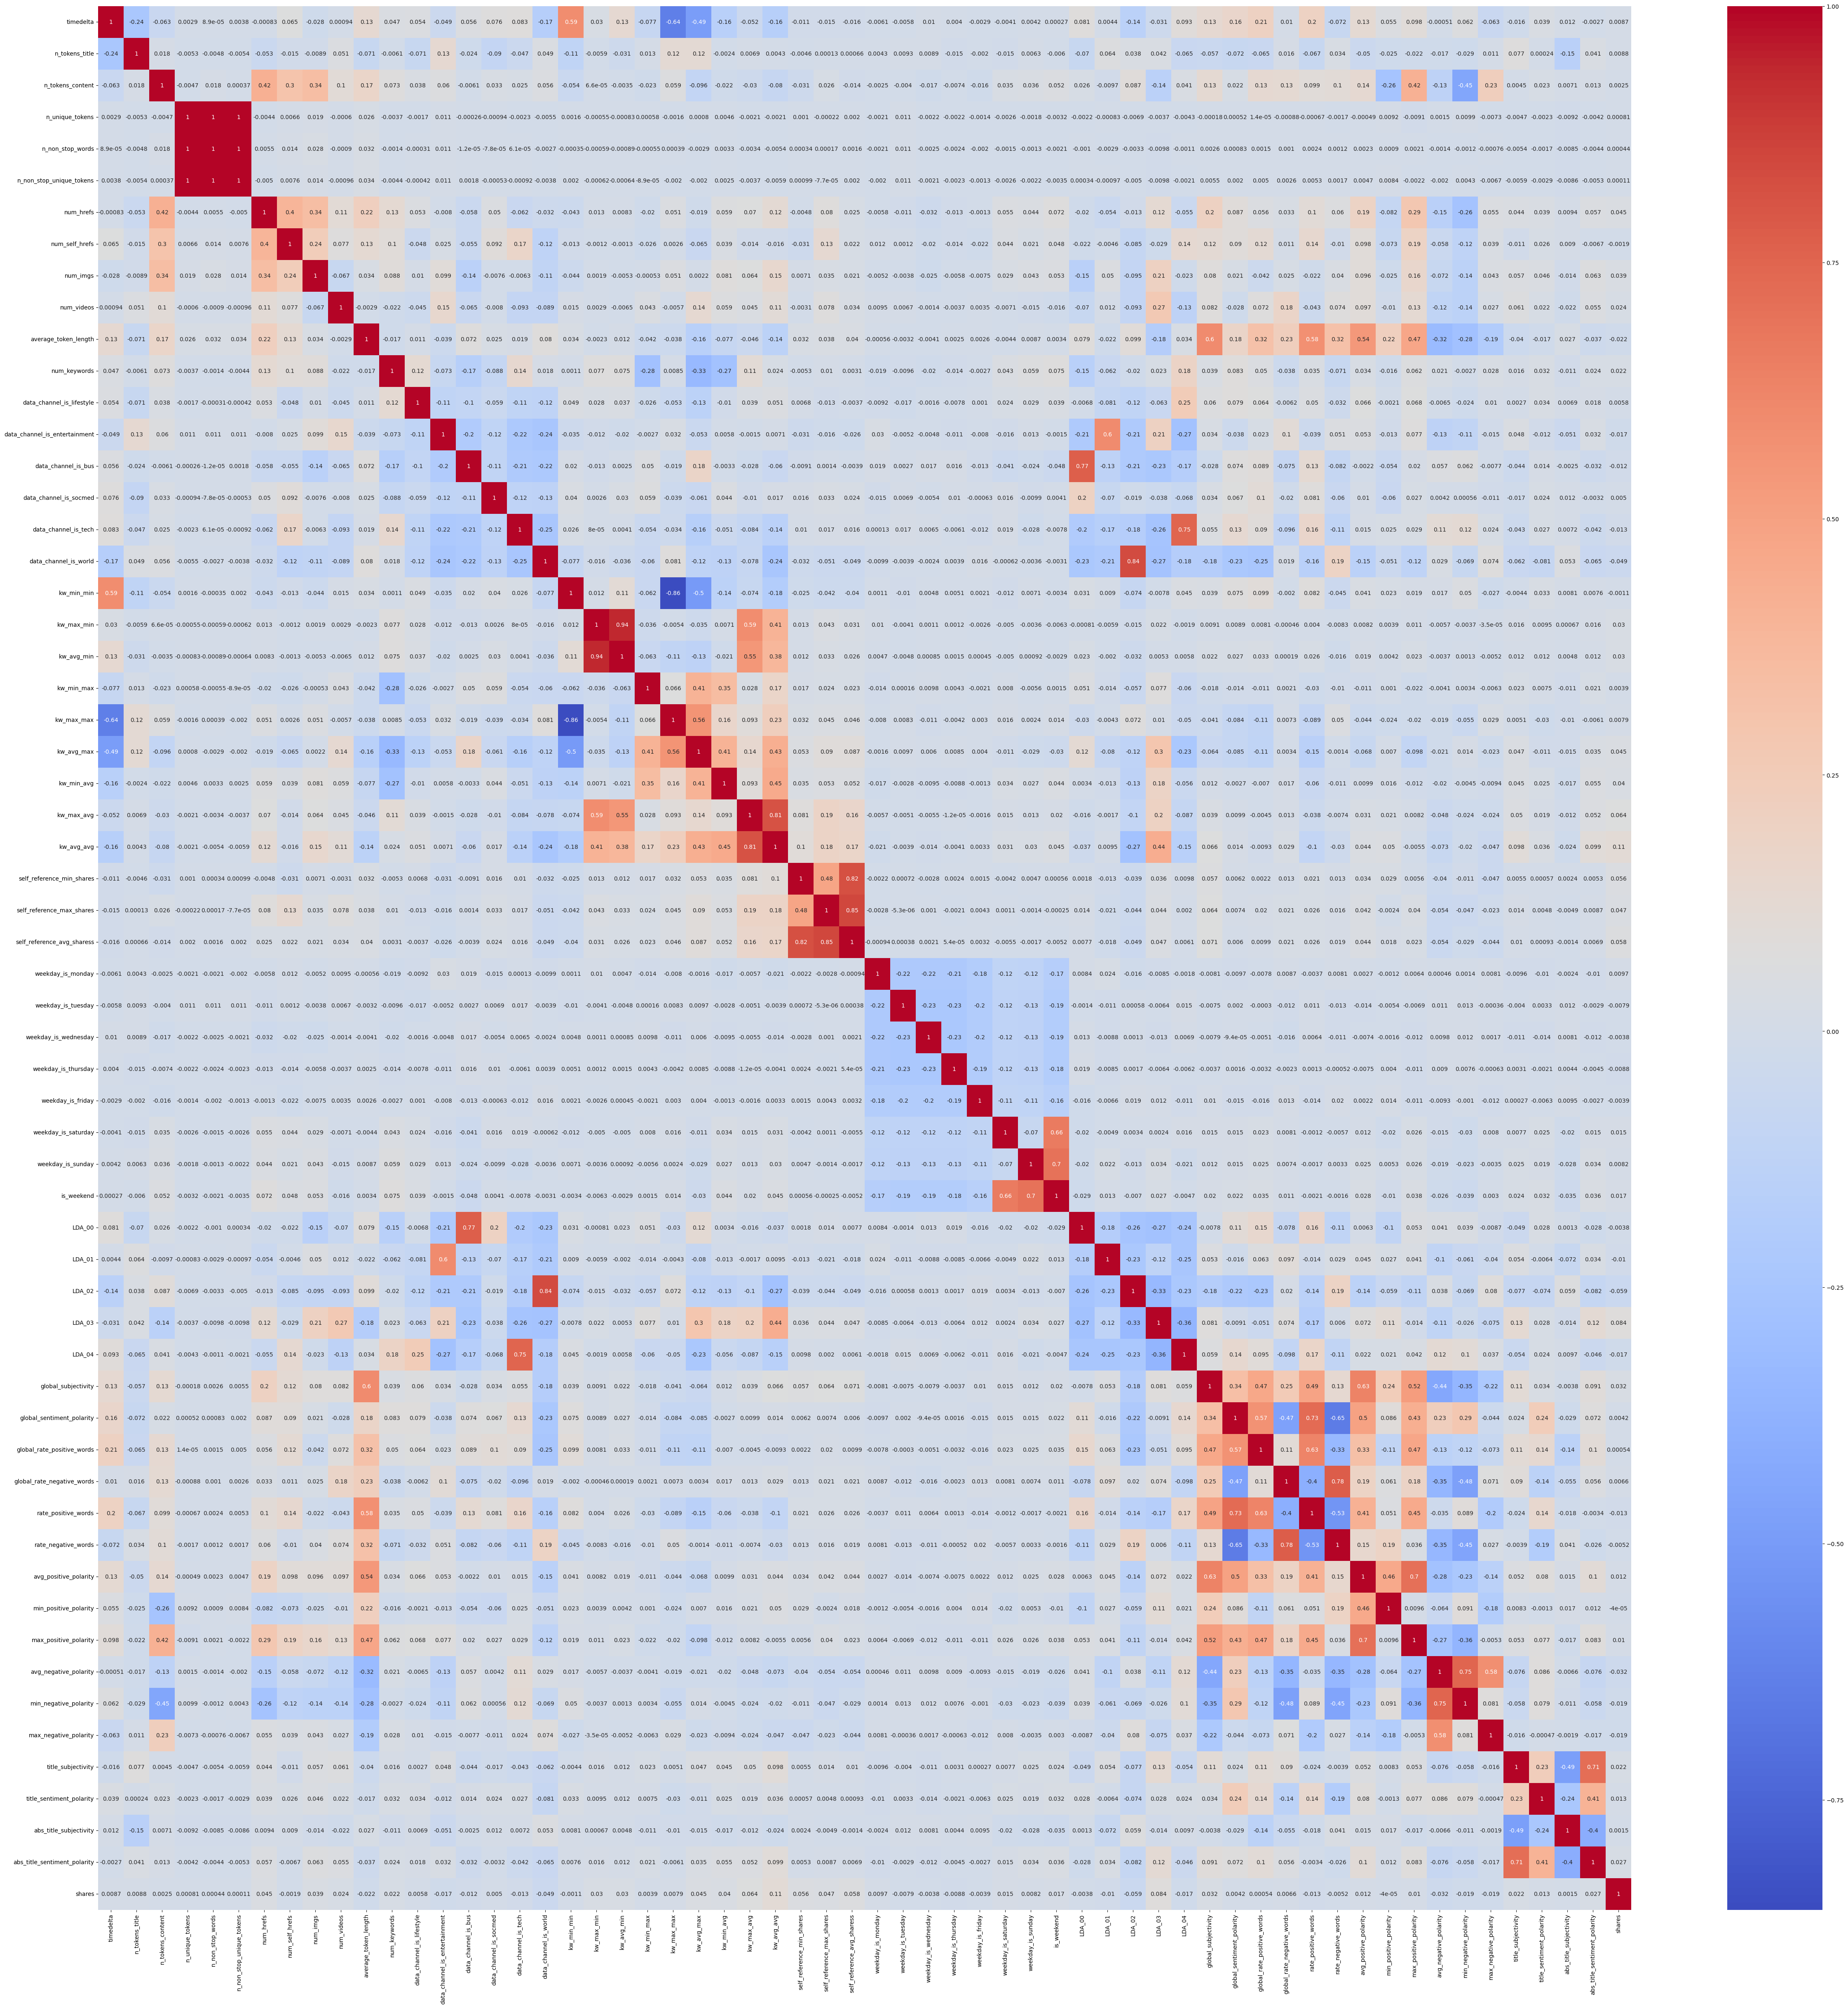

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(60,60))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

#### Inferences

Positive correlations:

Content and engagement: Several content-related features like n_tokens_content, n_unique_tokens, num_hrefs, num_imgs, num_videos, and num_keywords show positive correlations with shares. This suggests that longer, more informative videos with more links, images, and videos tend to get shared more.
Channel and engagement: Data channels like data_channel_is_lifestyle, data_channel_is_entertainment, and data_channel_is_tech have positive correlations with shares. This indicates that videos from these channels tend to be more popular and get shared more often.
Sentiment and engagement: There are positive correlations between global_rate_positive_words, rate_positive_words, avg_positive_polarity, and shares. This suggests that videos with more positive sentiment tend to get shared more.
Keywords and engagement: Some keyword-related features like kw_min_max, kw_max_max, and kw_avg_max show positive correlations with shares. This might indicate that using a wider range of keywords is associated with higher engagement.
    
Negative correlations:

Stop words and engagement: n_stop_words shows a negative correlation with shares. This suggests that using fewer stop words (common words like "the" and "a") might be associated with higher engagement.
Negative sentiment and engagement: There are negative correlations between global_rate_negative_words, rate_negative_words, avg_negative_polarity, and shares. This suggests that videos with more negative sentiment tend to get shared less.

Other interesting observations:

Title subjectivity and sentiment: Title subjectivity and sentiment don't show strong correlations with shares. This suggests that the title's emotional tone might not be a major factor in how many shares a video gets.
Self-referencing and shares: There are weak correlations between self-referencing features (self_reference_min_shares, etc.) and shares. This makes it difficult to draw any conclusions about the impact of self-referencing on video popularity.
Weekday and shares: The heatmap doesn't show clear patterns for correlations between weekdays and shares. This suggests that the day of the week a video is published might not have a significant impact on its performance.

In [13]:
print(df.columns)

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

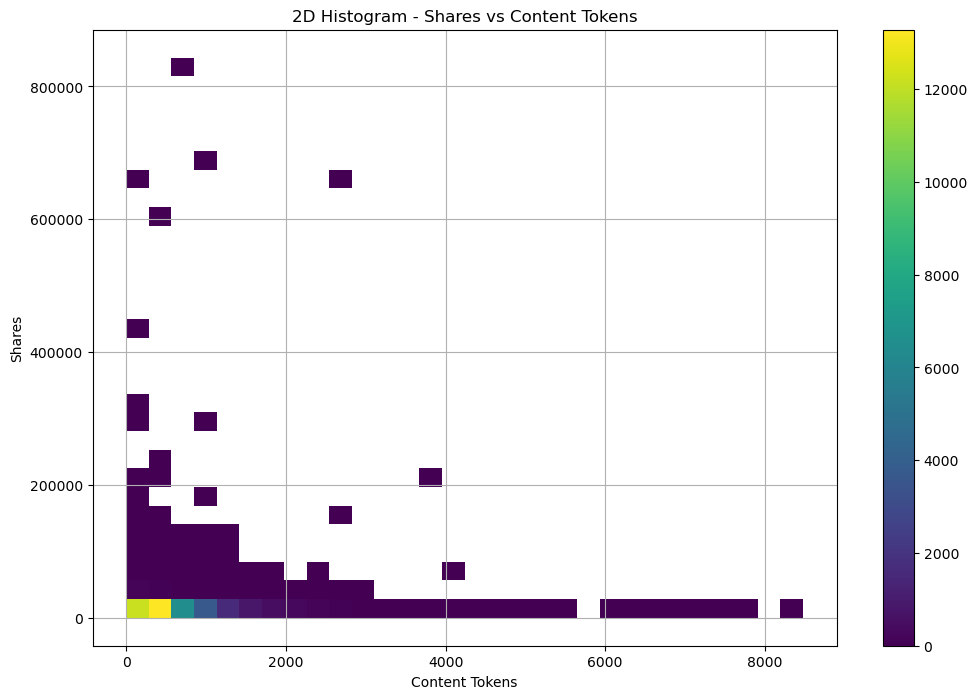

In [14]:
# Remove leading and trailing spaces in column names
df.columns = df.columns.str.strip()

# Plot 2D histogram or heatmap using the correct column names
plt.figure(figsize=(12, 8))
sns.histplot(x=df['n_tokens_content'], y=df['shares'], bins=(30, 30), cmap='viridis', cbar=True)
plt.title('2D Histogram - Shares vs Content Tokens')
plt.xlabel('Content Tokens')
plt.ylabel('Shares')
plt.grid(True)
plt.show()

In [6]:
# Drop the 'url' column
df = df.drop('url', axis=1)

In [7]:
print(df.columns)

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

# Feature Selection and Dimensionality Reduction

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA 

# Feature selection using correlation with the response variable
correlation_with_shares = df.corr()['shares'].abs().sort_values(ascending=False)
selected_features = correlation_with_shares[1:11].index  # Selected top 10 features

# Dimensionality reduction using PCA
pca = PCA(n_components=10)  # Choosed the number of components based on explained variance
pca_result = pca.fit_transform(df.drop('shares', axis=1))



# Train/Cross-validate Linear Regression Model

In [9]:
# Splited data into features and target variable
X = df[selected_features]  # Used the selected features
y = df['shares']

# Splited the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialized and trained the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicted on the test set
y_pred = model.predict(X_test)

# Evaluated model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Reported on performance
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 117772231.55189602
R-squared: 0.024028830018234193


# Conclusion
The aim of our study is the identify and reduce the explanatory variables. Our dataset has 61 explanatory variables. Through our correlation heatmap. We have identified that
Title subjectivity and sentiment don't show strong correlations with shares. 
There are weak correlations between self-referencing features (self_reference_min_shares, etc.) and shares. 
Weekday and shares: The heatmap doesn't show clear patterns for correlations between weekdays and shares.
Hence we can eliminate these explanatory variables when we are analysing the dataset